In [1]:
#Basic imports

import pandas as pd
import numpy as np
from scipy import stats
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import SimpleImputer, KNNImputer
import seaborn as sns

In [2]:
#Create DataFrame with Null and duplicates

data = [{'Name': 'Nikhil', 'Age': 24, 'Gender': 'M', 'Weight': 63.8, 'Height': 180},
       {'Name': 'John', 'Age': 25, 'Weight': 76.8, 'Height': 180},
       {'Name': 'Mary', 'Age': 26, 'Gender': 'F', 'Weight': 55.8, 'Height': 180},
       {'Name': 'Micheal', 'Gender': 'M', 'Weight': 81.8, 'Height': 180},
       {'Name': 'Smith', 'Age': 48, 'Gender': 'M', 'Height': 180},
       {'Name': 'Virat', 'Age': 33, 'Gender': 'M', 'Weight': 78.8, 'Height': 180},
       {'Name': 'Nikhil', 'Age': 24, 'Gender': 'M', 'Weight': 63.8, 'Height': 180},
       {'Name': 'Virat', 'Age': 33, 'Gender': 'M', 'Weight': 78.8, 'Height': 180},
       {'Name': 'Anushka', 'Age': 20, 'Gender': 'F', 'Height': 180},
       {'Name': 'Jini', 'Age': 22, 'Gender': 'F', 'Weight': 53.8}]

df1 = pd.DataFrame(data, columns=['Name','Age','Gender','Weight','Height'])

data = [{'Name': 'Nikhil', 'Experience': 10, 'Salary': 800000},
       {'Name': 'Nikhil', 'Experience': 14, 'Salary': 850000},
       {'Name': 'Nikhil', 'Experience': 17},
       {'Name': 'Nikhil', 'Experience': 25, 'Salary': 1100000},
       {'Name': 'Nikhil', 'Experience': 5, 'Salary': 80000},
       {'Name': 'Nikhil', 'Experience': 30},
       {'Name': 'Nikhil', 'Experience': 34, 'Salary': 1300000},
       {'Name': 'Nikhil', 'Experience': 40},
        {'Name': 'Nikhil', 'Experience': 32, 'Salary': 1300000},
       ]

df_salary = pd.DataFrame(data, columns=['Name','Experience','Salary'])

In [3]:
df1

,Name,Age,Gender,Weight,Height
0,Nikhil,24.0,M,63.8,180.0
1,John,25.0,NaN,76.8,180.0
2,Mary,26.0,F,55.8,180.0
3,Micheal,NaN,M,81.8,180.0
4,Smith,48.0,M,NaN,180.0
5,Virat,33.0,M,78.8,180.0
6,Nikhil,24.0,M,63.8,180.0
7,Virat,33.0,M,78.8,180.0
8,Anushka,20.0,F,NaN,180.0
9,Jini,22.0,F,53.8,NaN


In [4]:
#Always make copy of original dataSet in order to rollback
df = df1.copy()

#### DUPLICATE VALUES

In [5]:
#We check duplicate rows
df.duplicated()         #True represent that particular row is duplicated

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7     True
8    False
9    False
dtype: bool

In [6]:
dups = df.duplicated()           #We seperately see duplicated rows via this
df[dups]

,Name,Age,Gender,Weight,Height
6,Nikhil,24.0,M,63.8,180.0
7,Virat,33.0,M,78.8,180.0


In [7]:
# Identify rows with duplicate values in only certain columns
dups = df.duplicated(['Height'])
df[dups]

,Name,Age,Gender,Weight,Height
1,John,25.0,NaN,76.8,180.0
2,Mary,26.0,F,55.8,180.0
3,Micheal,NaN,M,81.8,180.0
4,Smith,48.0,M,NaN,180.0
5,Virat,33.0,M,78.8,180.0
6,Nikhil,24.0,M,63.8,180.0
7,Virat,33.0,M,78.8,180.0
8,Anushka,20.0,F,NaN,180.0


In [8]:
dups = df.duplicated(['Age'])
df[dups]

,Name,Age,Gender,Weight,Height
6,Nikhil,24.0,M,63.8,180.0
7,Virat,33.0,M,78.8,180.0


In [9]:
 # By- Default it keep the first Duplicates and drop another if you want to keep last duplicate using param 'keep' = 'last'

df.drop_duplicates()      #Notice index 6 and 7 is missing and index 0 , 5 stay

,Name,Age,Gender,Weight,Height
0,Nikhil,24.0,M,63.8,180.0
1,John,25.0,NaN,76.8,180.0
2,Mary,26.0,F,55.8,180.0
3,Micheal,NaN,M,81.8,180.0
4,Smith,48.0,M,NaN,180.0
5,Virat,33.0,M,78.8,180.0
8,Anushka,20.0,F,NaN,180.0
9,Jini,22.0,F,53.8,NaN


In [10]:
df.drop_duplicates(keep='last')    #Notice index 0 and 5 is missing and index 6 , 7 stay

,Name,Age,Gender,Weight,Height
1,John,25.0,NaN,76.8,180.0
2,Mary,26.0,F,55.8,180.0
3,Micheal,NaN,M,81.8,180.0
4,Smith,48.0,M,NaN,180.0
6,Nikhil,24.0,M,63.8,180.0
7,Virat,33.0,M,78.8,180.0
8,Anushka,20.0,F,NaN,180.0
9,Jini,22.0,F,53.8,NaN


#### NULL VALUES

In [11]:
#Always make copy of original dataSet in order to rollback
df_copy = df1.copy()

<AxesSubplot:>

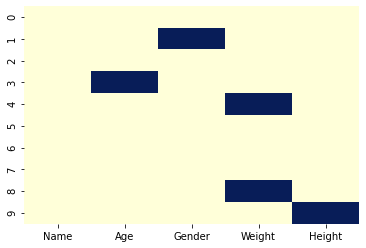

In [12]:
#Visualize NULL values
sns.heatmap(df_copy.isnull(), cbar=False, cmap="YlGnBu")

In [13]:
# Mathamatically visualize null values
df_copy.isna().sum()

Name      0
Age       1
Gender    1
Weight    2
Height    1
dtype: int64

In [14]:
# In order to remove null we simply drop if nulls r not in majority

df_copy.dropna()

,Name,Age,Gender,Weight,Height
0,Nikhil,24.0,M,63.8,180.0
2,Mary,26.0,F,55.8,180.0
5,Virat,33.0,M,78.8,180.0
6,Nikhil,24.0,M,63.8,180.0
7,Virat,33.0,M,78.8,180.0


#### MISSING VALUES

In [15]:
df_sal_copy = df_salary.copy()

In [16]:
df_sal_copy

,Name,Experience,Salary
0,Nikhil,10,800000.0
1,Nikhil,14,850000.0
2,Nikhil,17,NaN
3,Nikhil,25,1100000.0
4,Nikhil,5,80000.0
5,Nikhil,30,NaN
6,Nikhil,34,1300000.0
7,Nikhil,40,NaN
8,Nikhil,32,1300000.0


In [17]:
# Simple Imputer is descriptive statistics filler. Strategy can be 'mean', 'median', 'mode' and 'Constant'.
# param 'missing values' defines what the value present in df which we going to fill with strategy.
# If we use strategy 'constant' we need another param called 'fill_value'

imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
X = df_sal_copy[['Salary','Experience']]
updated_X = imputer.fit_transform(X)

In [18]:
df_sal_copy[['Salary','Experience']] = updated_X
df_sal_copy

,Name,Experience,Salary
0,Nikhil,10.0,800000.0
1,Nikhil,14.0,850000.0
2,Nikhil,17.0,905000.0
3,Nikhil,25.0,1100000.0
4,Nikhil,5.0,80000.0
5,Nikhil,30.0,905000.0
6,Nikhil,34.0,1300000.0
7,Nikhil,40.0,905000.0
8,Nikhil,32.0,1300000.0


In [19]:
df_sal_copy = df_salary.copy()
imputer = SimpleImputer(missing_values= np.nan, strategy='constant', fill_value= 0)   # For STRING Column we used STRING values.
X = df_sal_copy[['Salary','Experience']]
updated_X = imputer.fit_transform(X)

df_sal_copy[['Salary','Experience']] = updated_X
df_sal_copy

,Name,Experience,Salary
0,Nikhil,10.0,800000.0
1,Nikhil,14.0,850000.0
2,Nikhil,17.0,0.0
3,Nikhil,25.0,1100000.0
4,Nikhil,5.0,80000.0
5,Nikhil,30.0,0.0
6,Nikhil,34.0,1300000.0
7,Nikhil,40.0,0.0
8,Nikhil,32.0,1300000.0


In [20]:
#Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set.
# Two samples are close if the features that neither is missing are close.

df_sal_copy = df_salary.copy()
imputer = KNNImputer(n_neighbors=3)
X = df_sal_copy[['Salary','Experience']]
updated_X = imputer.fit_transform(X)

df_sal_copy[['Salary','Experience']] = updated_X
df_sal_copy

,Name,Experience,Salary
0,Nikhil,10.0,8.000000e+05
1,Nikhil,14.0,8.500000e+05
2,Nikhil,17.0,9.166667e+05
3,Nikhil,25.0,1.100000e+06
4,Nikhil,5.0,8.000000e+04
5,Nikhil,30.0,1.233333e+06
6,Nikhil,34.0,1.300000e+06
7,Nikhil,40.0,1.233333e+06
8,Nikhil,32.0,1.300000e+06


In [21]:
# When we know our data is sequential we can methods like bfill ,ffill , fillna

df_sal_copy = df_salary.copy()
df_sal_copy['Salary'].bfill()

0     800000.0
1     850000.0
2    1100000.0
3    1100000.0
4      80000.0
5    1300000.0
6    1300000.0
7    1300000.0
8    1300000.0
Name: Salary, dtype: float64

In [22]:
df_sal_copy['Salary'].ffill()

0     800000.0
1     850000.0
2     850000.0
3    1100000.0
4      80000.0
5      80000.0
6    1300000.0
7    1300000.0
8    1300000.0
Name: Salary, dtype: float64

In [23]:
df_sal_copy['Salary'].fillna(value= 0)

0     800000.0
1     850000.0
2          0.0
3    1100000.0
4      80000.0
5          0.0
6    1300000.0
7          0.0
8    1300000.0
Name: Salary, dtype: float64

In [24]:
df_sal_copy['Salary'].replace(np.nan, 100)

0     800000.0
1     850000.0
2        100.0
3    1100000.0
4      80000.0
5        100.0
6    1300000.0
7        100.0
8    1300000.0
Name: Salary, dtype: float64

<AxesSubplot:>

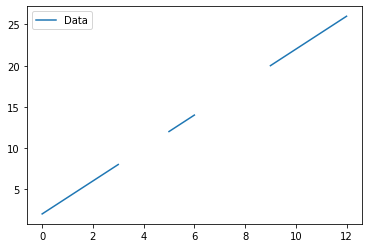

In [25]:
# Interpolate    use param 'method' we do bfill, ffill etc., from here..
# if we know our data i.e., values are in linear , quardatic, cubic , spinal etc., we give this as params in 'method'. 

new_df = pd.DataFrame([2,4,6,8,np.nan,12,14,np.nan,np.nan,20,22,24,26], columns=['Data'])
new_df.plot()

<AxesSubplot:>

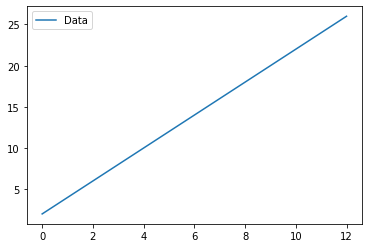

In [26]:
new_df['Data'].interpolate(method = 'linear', inplace = True)
new_df.plot()

<AxesSubplot:>

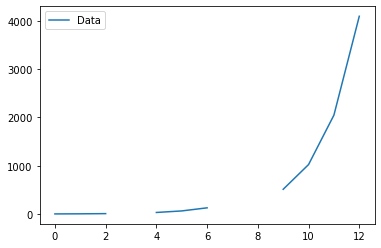

In [27]:
new_df = pd.DataFrame([2,4,8,np.nan,32,64,128,np.nan,np.nan,512,1024,2048,4096] , columns=['Data'])
new_df.plot()

<AxesSubplot:>

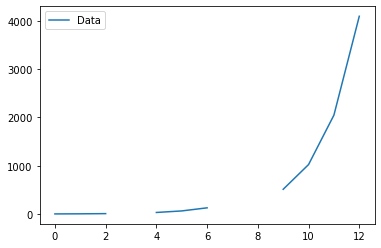

In [28]:
new_df['Data'].interpolate(method = 'linear')
new_df.plot()

In [29]:
new_df

,Data
0,2.0
1,4.0
2,8.0
3,NaN
4,32.0
5,64.0
6,128.0
7,NaN
8,NaN
9,512.0


<AxesSubplot:>

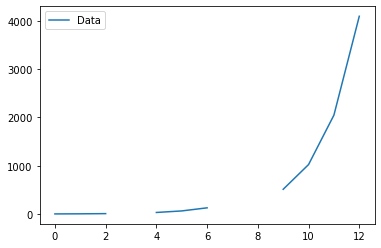

In [30]:
new_df['Data'].interpolate(method = 'quadratic', order= 2)
new_df.plot()